In [3]:
def get_word_from_position(value, pos): #value - input string, pos-number of position
  starts = [0]
  ends = [len(value)]

  if value[pos] == ' ':
    return '_'
  else:
    for v in range(len(value)):
      if value[v] == ' ' and v < pos:
        starts.append(v)
      elif value[v] == ' ' and v > pos:
        ends.append(v)
    return value[max(starts):min(ends)]

In [4]:
!pip install Levenshtein
import Levenshtein
import copy
from collections import Counter
import string as s
import re

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
my_data = pd.read_csv('/content/drive/MyDrive/term_paper/bd_final.csv')
my_data.tail()

,filename,transcription,text,wer,cer,alignment
6812,ffc60718b65e.wav,я больше никогда не возвращалась в этот город ...,я больше никогда не возвращалась в этот город ...,0.153846,0.027027,я больше никогда не возвращалась в этот город ...
6813,ffde0df9359d.wav,он не играет он болен тогда коварный план,он не играет он болен и тогда коварный план,0.111111,0.046512,он не играет он болен и тогда коварный план ||...
6814,ffef913e2053.wav,это потепление что в целом неконрректно,это потепление что в целом некорректно,0.166667,0.026316,это потепление что в целом неко-рректно ||| эт...
6815,fff6102ea9d2.wav,это мемо изентернети канотасканныет,это мемы из интернетика натасканные,0.800000,0.200000,это мемы из интернети-ка натасканные- ||| это ...
6816,fffe73e4cb75.wav,смотрите друг другу в глаза,смотрите друг другу в глаза,0.000000,0.000000,смотрите друг другу в глаза ||| смотрите друг ...


In [ ]:
draw = []
lev = []

def levencrawling(decoded, true):#decoded - machine transcript, true - true string
  
  levenshtein = Levenshtein.editops(str(decoded), str(true))
  deviation = 0
  lev = levenshtein
  try:
    for elem in lev:
      if elem[0] == 'insert':
        inst = decoded,true,'Inserted',get_word_from_position(decoded, elem[1]),'>',get_word_from_position(true, elem[2]), decoded[elem[1]],'>', true[elem[2]], len(str(get_word_from_position(true, elem[2]))) #elem2 это элемент правильно строки то есть в выдаче(1 1) первая единица - ошибочный символ вторая - правильный
        draw.append(inst)
      elif elem[0] == 'delete':
        dele = decoded,true,'Deleted',get_word_from_position(decoded, elem[1]),'>',get_word_from_position(true, elem[2]), decoded[elem[1]],'>', true[elem[2]], len(str(get_word_from_position(true, elem[2])))-1
        draw.append(dele)
      elif elem[0] == 'replace':
        repl = decoded,true,'Replaced',get_word_from_position(decoded, elem[1]),'>',get_word_from_position(true, elem[2]), decoded[elem[1]],'>', true[elem[2]], len(str(get_word_from_position(true, elem[2])))-1
        draw.append(repl)
      else:
        pass
    return lev
  except IndexError:
    pass
  except TypeError:
    pass

In [ ]:

for i in range(len(my_data['transcription'])):
  levencrawling(my_data['transcription'][i],my_data['text'][i])

In [ ]:
draw[:10],len(draw)

In [ ]:
transcription = []
text = []
error_type = []
error_word = []
true_word = []
error_letter = []
true_letter = []
word_length = []
for i in draw:
  transcription.append(i[0])
  text.append(i[1])
  error_type.append(i[2])
  error_word.append(i[3])
  true_word.append(i[5])
  error_letter.append(i[6])
  true_letter.append(i[8])
  word_length.append(i[9])


In [ ]:
transcription[:10]

['но вряд ли кто обменяет этот момент прозрение и озарение на то что',
 'но вряд ли кто обменяет этот момент прозрение и озарение на то что',
 'но вряд ли кто обменяет этот момент прозрение и озарение на то что',
 'но вряд ли кто обменяет этот момент прозрение и озарение на то что',
 'но вряд ли кто обменяет этот момент прозрение и озарение на то что',
 'но вряд ли кто обменяет этот момент прозрение и озарение на то что',
 'пимер в конце зимы начали весны проходит фестеваль извинеции в москву',
 'пимер в конце зимы начали весны проходит фестеваль извинеции в москву',
 'пимер в конце зимы начали весны проходит фестеваль извинеции в москву',
 'пимер в конце зимы начали весны проходит фестеваль извинеции в москву']

In [ ]:
error_data = {'transcript': ['кторы его таким забавным образом проявляют','тактаки счастливые довольные радуется жизни нечего подобного','но вряд ли кто обменяет этот момент прозрение и озарение на то что', 'пимер в конце зимы начали весны проходит фестеваль извинеции в москву', 'это потепление что в целом неконрректно','поздна ложится спать'], 'true': ['которые таким забавным образом проявляются','такими счастливыми довольными радующимися жизни ничего подобного','но вряд ли кто обменяет этот момент прозрения и озарения на то', 'например в конце зимы начале весны проходит фестиваль из венеции в москву', 'это потепление что в целом некорректно', 'нельзя поздно ложиться спать']}
error_data = pd.DataFrame(data=d)
error_data

In [ ]:
error_data = pd.DataFrame(list(zip(transcription,text,error_type,error_word,true_word,error_letter,true_letter,word_length)), columns = ['transcription','text','error_type','error_word','true_word','error_letter','true_letter','word_length']) 
error_data


,transcription,text,error_type,error_word,true_word,error_letter,true_letter,word_length
0,но вряд ли кто обменяет этот момент прозрение ...,но вряд ли кто обменяет этот момент прозрения ...,Replaced,прозрение,прозрения,е,я,9
1,но вряд ли кто обменяет этот момент прозрение ...,но вряд ли кто обменяет этот момент прозрения ...,Replaced,озарение,озарения,е,я,8
2,но вряд ли кто обменяет этот момент прозрение ...,но вряд ли кто обменяет этот момент прозрения ...,Deleted,то,то,т,т,2
3,но вряд ли кто обменяет этот момент прозрение ...,но вряд ли кто обменяет этот момент прозрения ...,Deleted,то,то,о,т,2
4,но вряд ли кто обменяет этот момент прозрение ...,но вряд ли кто обменяет этот момент прозрения ...,Deleted,_,то,,т,2
...,...,...,...,...,...,...,...,...
42296,это мемо изентернети канотасканныет,это мемы из интернетика натасканные,Inserted,изентернети,_,е,,1
42297,это мемо изентернети канотасканныет,это мемы из интернетика натасканные,Replaced,изентернети,интернетика,е,и,11
42298,это мемо изентернети канотасканныет,это мемы из интернетика натасканные,Deleted,_,интернетика,,к,11
42299,это мемо изентернети канотасканныет,это мемы из интернетика натасканные,Inserted,канотасканныет,_,н,,1


In [ ]:
error_data.to_csv('/content/drive/MyDrive/term_paper/error_data.csv')

In [7]:
error_data = pd.read_csv('/content/drive/MyDrive/term_paper/error_data.csv')
error_data.tail()

,Unnamed: 0,transcription,text,error_type,error_word,true_word,error_letter,true_letter,word_length
42296,42296,это мемо изентернети канотасканныет,это мемы из интернетика натасканные,Inserted,изентернети,_,е,,1
42297,42297,это мемо изентернети канотасканныет,это мемы из интернетика натасканные,Replaced,изентернети,интернетика,е,и,11
42298,42298,это мемо изентернети канотасканныет,это мемы из интернетика натасканные,Deleted,_,интернетика,,к,11
42299,42299,это мемо изентернети канотасканныет,это мемы из интернетика натасканные,Inserted,канотасканныет,_,н,,1
42300,42300,это мемо изентернети канотасканныет,это мемы из интернетика натасканные,Replaced,канотасканныет,натасканные,о,а,11


In [8]:
error_data.pop('Unnamed: 0')
error_data[:10]

,transcription,text,error_type,error_word,true_word,error_letter,true_letter,word_length
0,но вряд ли кто обменяет этот момент прозрение ...,но вряд ли кто обменяет этот момент прозрения ...,Replaced,прозрение,прозрения,е,я,9
1,но вряд ли кто обменяет этот момент прозрение ...,но вряд ли кто обменяет этот момент прозрения ...,Replaced,озарение,озарения,е,я,8
2,но вряд ли кто обменяет этот момент прозрение ...,но вряд ли кто обменяет этот момент прозрения ...,Deleted,то,то,т,т,2
3,но вряд ли кто обменяет этот момент прозрение ...,но вряд ли кто обменяет этот момент прозрения ...,Deleted,то,то,о,т,2
4,но вряд ли кто обменяет этот момент прозрение ...,но вряд ли кто обменяет этот момент прозрения ...,Deleted,_,то,,т,2
5,но вряд ли кто обменяет этот момент прозрение ...,но вряд ли кто обменяет этот момент прозрения ...,Deleted,что,то,ч,т,2
6,пимер в конце зимы начали весны проходит фесте...,например в конце зимы начале весны проходит фе...,Inserted,пимер,например,п,н,8
7,пимер в конце зимы начали весны проходит фесте...,например в конце зимы начале весны проходит фе...,Inserted,пимер,например,п,а,8
8,пимер в конце зимы начали весны проходит фесте...,например в конце зимы начале весны проходит фе...,Inserted,пимер,например,и,р,8
9,пимер в конце зимы начали весны проходит фесте...,например в конце зимы начале весны проходит фе...,Replaced,начали,начале,и,е,6


In [9]:
replaced = error_data.loc[error_data['error_type'] == 'Replaced']
deleted = error_data.loc[error_data['error_type'] == 'Deleted']
inserted = error_data.loc[error_data['error_type'] == 'Inserted']

In [10]:
replaced = replaced.dropna(subset=['error_letter', 'true_letter', 'word_length'], how='any')
deleted = deleted.dropna(subset=['error_letter', 'true_letter', 'word_length'], how='any')
inserted = inserted.dropna(subset=['error_letter', 'true_letter', 'word_length'], how='any')
replaced.shape,deleted.shape,inserted.shape

((15187, 8), (10177, 8), (16937, 8))

In [11]:
from collections import Counter
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
!pip install squarify
import squarify 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


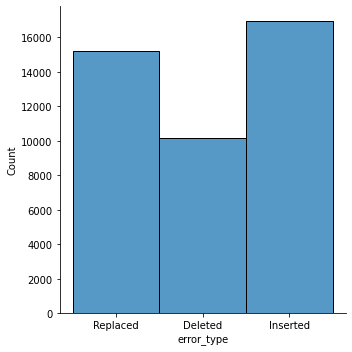

In [ ]:
sns.displot(error_data['error_type'], binwidth = 1)

plt.show()

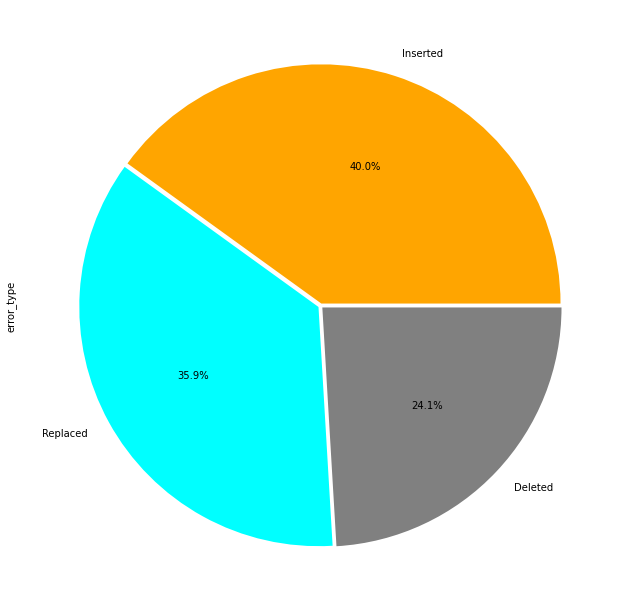

In [ ]:
counts = error_data['error_type'].value_counts()
explode = (0.01, 0.01, 0.01)
colors = ( "orange", "cyan", "grey") 
counts.plot.pie(autopct='%.1f%%', explode=explode, colors=colors, figsize = (11,11), subplots=True)
plt.show()

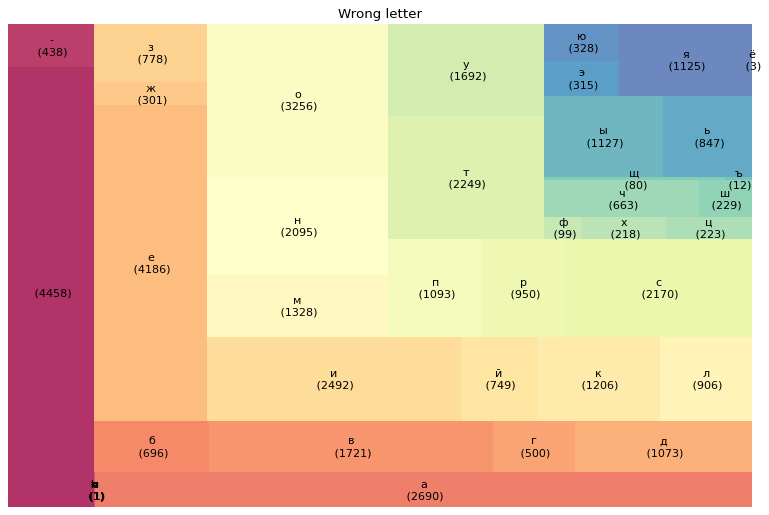

In [ ]:
#which letter is the most errorable 

df = error_data.groupby('error_letter').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Wrong letter')
plt.axis('off')
plt.show()

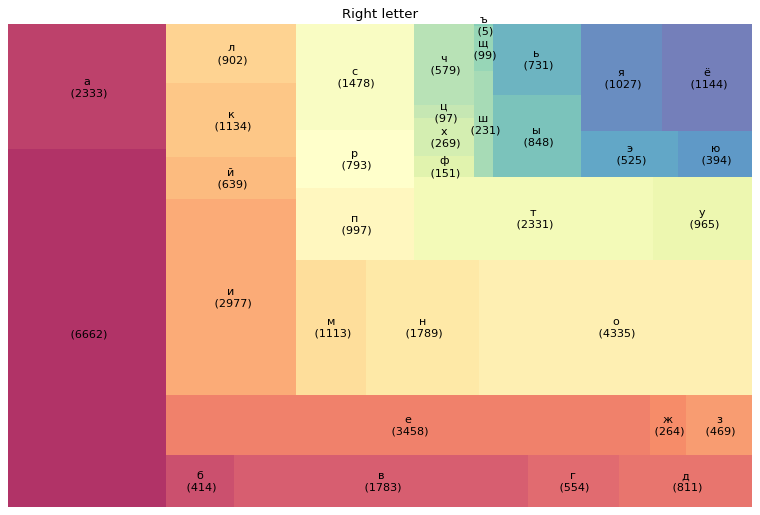

In [ ]:
#which letter is commonly right
df = error_data.groupby('true_letter').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Right letter')
plt.axis('off')
plt.show()

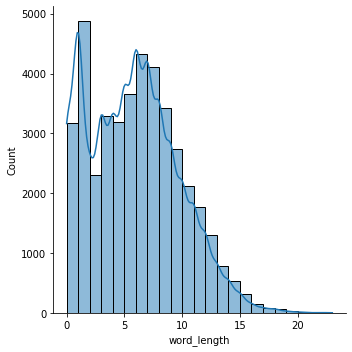

In [ ]:
#length of word
sns.displot(error_data['word_length'], binwidth = 1, kde = True)

plt.show()

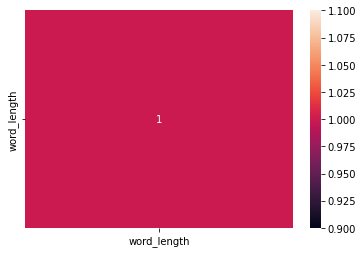

In [ ]:
sns.heatmap(error_data.corr(), annot = True)

In [19]:
a = error_data['true_word'].value_counts().index.tolist()

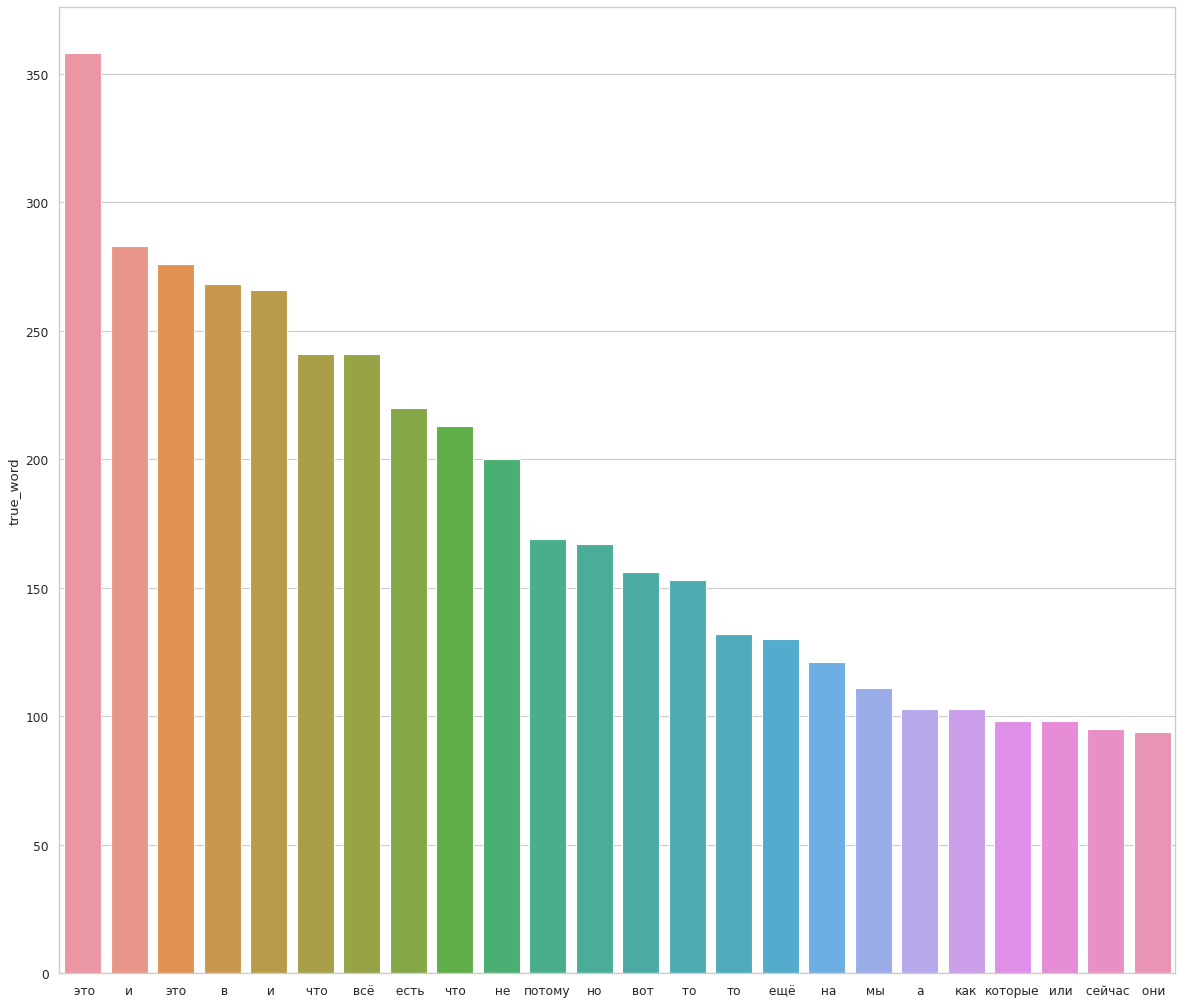

In [26]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(18, 16), dpi=80)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=a[1:25], y=error_data['true_word'].value_counts()[1:25])

In [28]:
error_data["pairs"] = error_data["error_letter"].astype(str) + ">" + error_data["true_letter"].astype(str)

In [29]:
error_data.head()

,transcription,text,error_type,error_word,true_word,error_letter,true_letter,word_length,pairs
0,но вряд ли кто обменяет этот момент прозрение ...,но вряд ли кто обменяет этот момент прозрения ...,Replaced,прозрение,прозрения,е,я,9,е>я
1,но вряд ли кто обменяет этот момент прозрение ...,но вряд ли кто обменяет этот момент прозрения ...,Replaced,озарение,озарения,е,я,8,е>я
2,но вряд ли кто обменяет этот момент прозрение ...,но вряд ли кто обменяет этот момент прозрения ...,Deleted,то,то,т,т,2,т>т
3,но вряд ли кто обменяет этот момент прозрение ...,но вряд ли кто обменяет этот момент прозрения ...,Deleted,то,то,о,т,2,о>т
4,но вряд ли кто обменяет этот момент прозрение ...,но вряд ли кто обменяет этот момент прозрения ...,Deleted,_,то,,т,2,>т


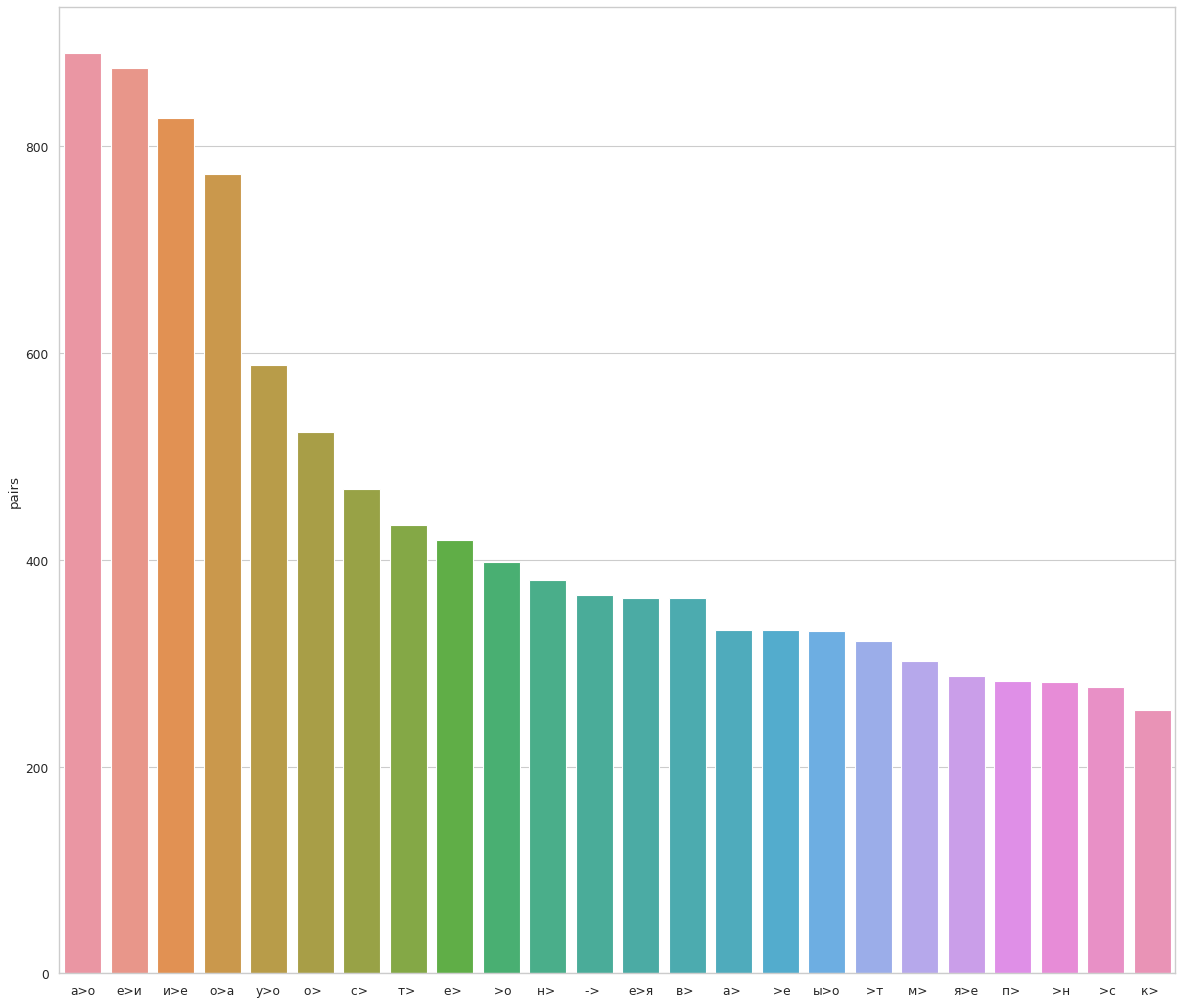

In [30]:
import seaborn as sns
from matplotlib.pyplot import figure
a = error_data['pairs'].value_counts().index.tolist()
figure(figsize=(18, 16), dpi=80)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=a[1:25], y=error_data['pairs'].value_counts()[1:25])

In [ ]:
corr = error_data.corr()

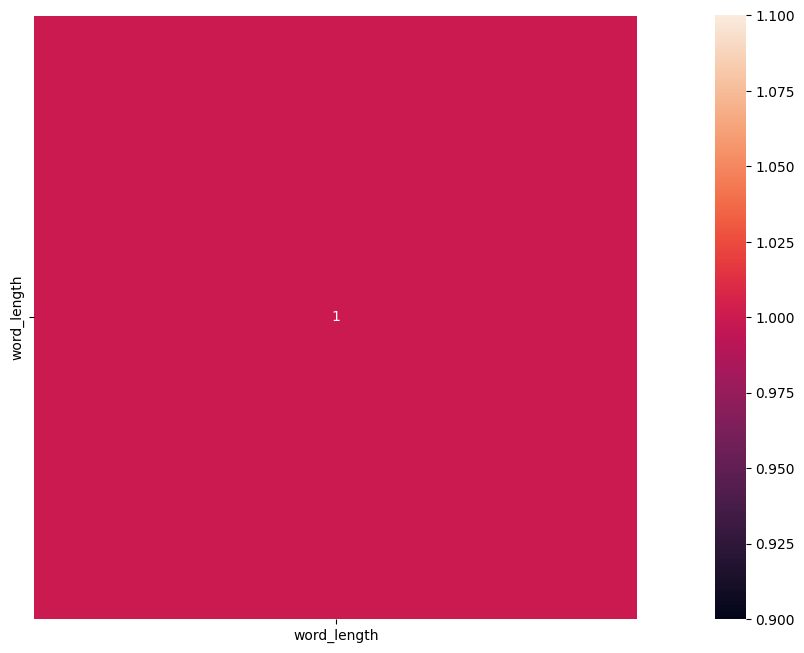

In [ ]:
plt.figure(figsize=(20, 8), dpi=100)

sns.heatmap(corr, square=True, linewidths=0.1, annot=True)